In [ ]:
#imports
import numpy as np
import pandas as pd
import sys
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from tqdm import tqdm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
imgs_folder = '/content/gdrive/MyDrive/Team/vision/assignment3'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
def plot_images(l_img, r_img):
  figure, axis = plt.subplots(1, 2, figsize=(20, 20), gridspec_kw={'width_ratios': [2, 2]})
  axis[0].imshow(cv2.cvtColor(l_img, cv2.COLOR_BGR2RGB))
  axis[1].imshow(cv2.cvtColor(r_img, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
def construct_window(mat,row,col,window_size):
  # if(not(row<0 or col<0 or row+window_size>=mat.shape[0] or col+window_size>= mat.shape[1])):
  #  arr = mat[row  : row+ window_size, col  : col + window_size ]
  #  return arr

  arr = np.array([[0 for i in range(window_size)] for j in range(window_size)])
  k=l=0
  for i in range(row,row+window_size):
    l=0
    for j in range(col,col+window_size):
      if(i<0 or j<0 or i>=mat.shape[0] or j>= mat.shape[1]):
        l=l+1
        continue
      arr[k][l]=mat[i][j]
      l=l+1
    k=k+1
  
  return arr

In [ ]:
def get_start_index(i,j,window_size):
  middle =window_size // 2
  return i-middle,j-middle


In [ ]:
def get_window(target_index,window_size,mat):
  row,col=get_start_index(target_index[0],target_index[1],window_size)
  array=construct_window(mat,row,col,window_size)
  return array

In [ ]:
def get_sad(window1,window2):
  subtract=np.subtract(window1,window2)
  result = abs(subtract)
  return np.sum(result)

In [ ]:
def get_ssd(window1,window2):
  subtract=np.subtract(window1,window2)
  result = abs(subtract)
  squared_result=np.square(result)
  return np.sum(squared_result)

In [ ]:
def get_block_matches(image1,image2,window_size,method,offset,function_sad,function_ssd):
  disparity_array_sad=np.zeros((image1.shape[0],image1.shape[1]))
  disparity_array_ssd=np.zeros((image1.shape[0],image1.shape[1]))

  for i in tqdm(range(0,image1.shape[0]), dynamic_ncols=1):

    for j in range(0,image1.shape[1]):

      target_index=[i,j]
      fixed_window=get_window(target_index,window_size,image1)
      value_sad=sys.maxsize
      value_ssd=sys.maxsize
      matched_index_sad=-1
      matched_index_ssd=-1

      start=max(0,j-offset)
      for k in range(start,j):
        temp_target_index=[i,k]
        temp_window=get_window(temp_target_index,window_size,image2)
        func_value_sad=function_sad(fixed_window,temp_window)
        func_value_ssd=function_ssd(fixed_window,temp_window)

        if(func_value_sad<value_sad):
            value_sad=func_value_sad
            matched_index_sad=k

        if(func_value_ssd<value_ssd):
            value_ssd=func_value_ssd
            matched_index_ssd=k
       

      disparity_sad=abs(matched_index_sad-j)
      disparity_ssd=abs(matched_index_ssd-j)

      disparity_array_sad[i][j]=disparity_sad
      disparity_array_ssd[i][j]=disparity_ssd


  return disparity_array_sad,disparity_array_ssd

In [ ]:
def get_results(image1,image2,offset):
  img_l = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  img_r = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
  plot_images(img_l, img_r)

  windowSizes = [1,5, 9]
  for i in windowSizes:
    print("*************************************************************Using window size = ",i,"*************************************************************")
    matched_array_sad,matched_array_ssd=get_block_matches(img_l,img_r,i,0,offset,get_sad,get_ssd)
    max_sad = np.max(matched_array_sad)
    diparity_array_sad = np.multiply(matched_array_sad,255/max_sad)
    print("**************************************************************** SAD results ****************************************************************")
    cv2_imshow(diparity_array_sad)
    print("**************************************************************** SSD results ****************************************************************")
    max_ssd = np.max(matched_array_ssd)
    diparity_array_ssd = np.multiply(matched_array_ssd,255/max_ssd)
    cv2_imshow(diparity_array_ssd)
    print("Difference")
    cv2_imshow(abs(np.subtract(diparity_array_sad,diparity_array_ssd)))



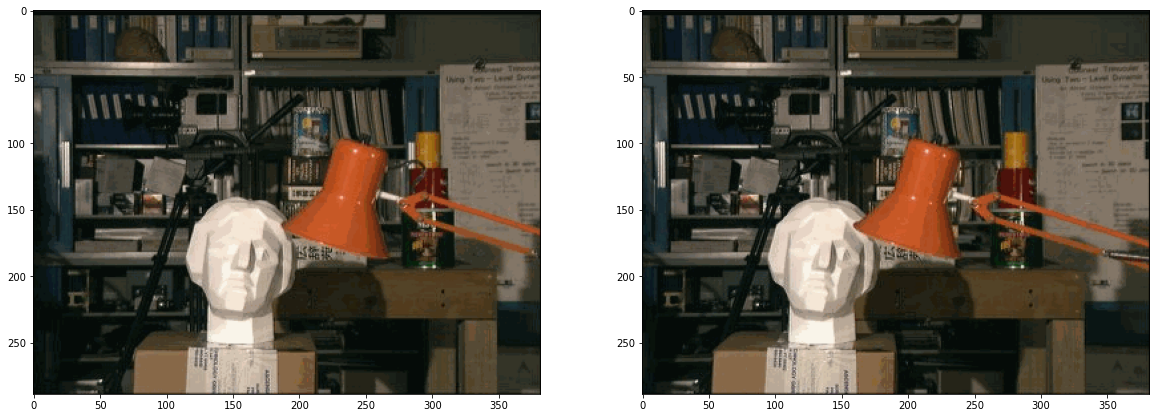

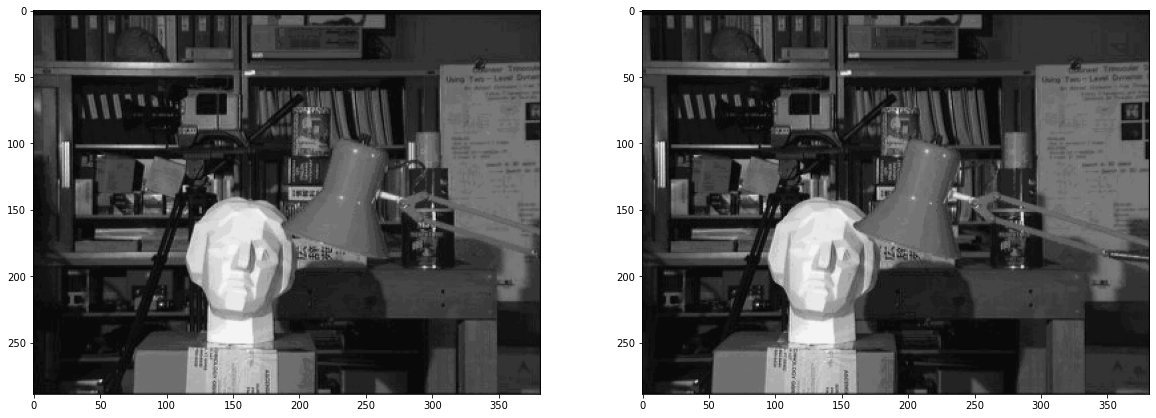

*************************************************************Using window size =  1 *************************************************************


100%|██████████| 289/289 [00:54<00:00,  5.28it/s]

**************************************************************** SAD results ****************************************************************


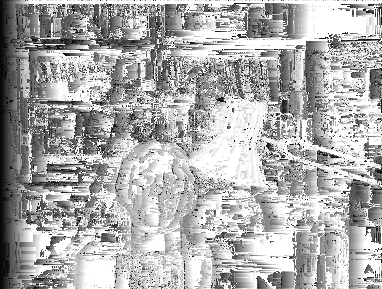

**************************************************************** SSD results ****************************************************************


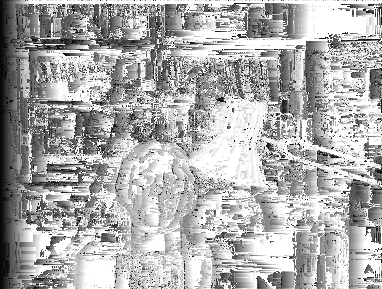

Difference


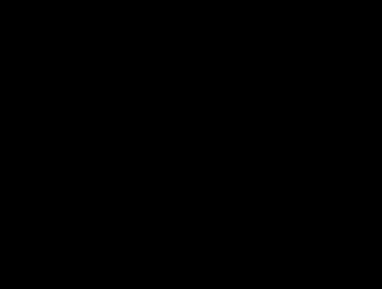

*************************************************************Using window size =  5 *************************************************************


100%|██████████| 289/289 [02:18<00:00,  2.08it/s]

**************************************************************** SAD results ****************************************************************


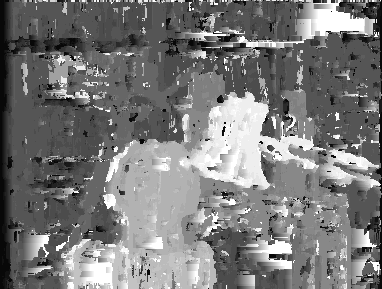

**************************************************************** SSD results ****************************************************************


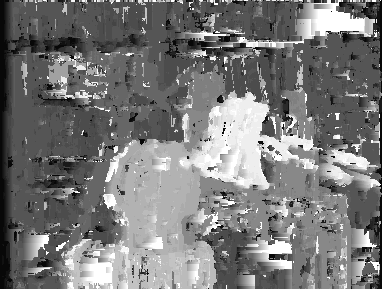

Difference


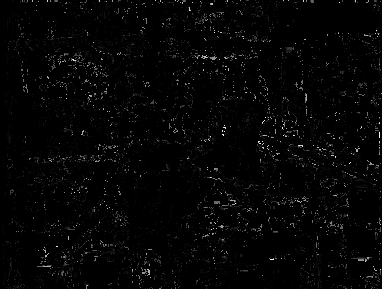

*************************************************************Using window size =  9 *************************************************************


100%|██████████| 289/289 [05:02<00:00,  1.05s/it]

**************************************************************** SAD results ****************************************************************


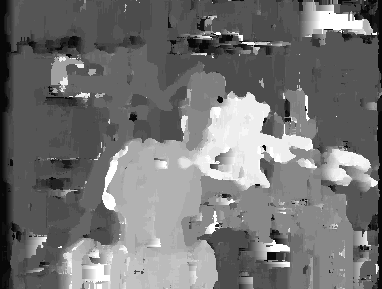

**************************************************************** SSD results ****************************************************************


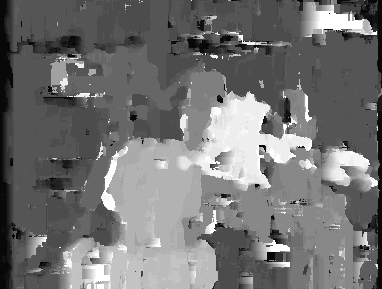

Difference


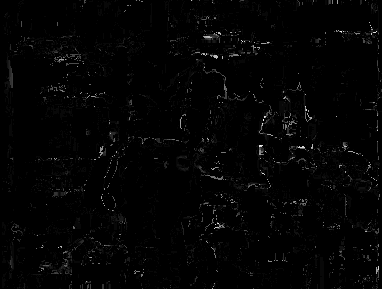

In [ ]:
office_l = cv2.imread(imgs_folder + '/l1.png')
office_r = cv2.imread(imgs_folder + '/r1.png')
plot_images(office_l, office_r)
get_results(office_l,office_r,30)


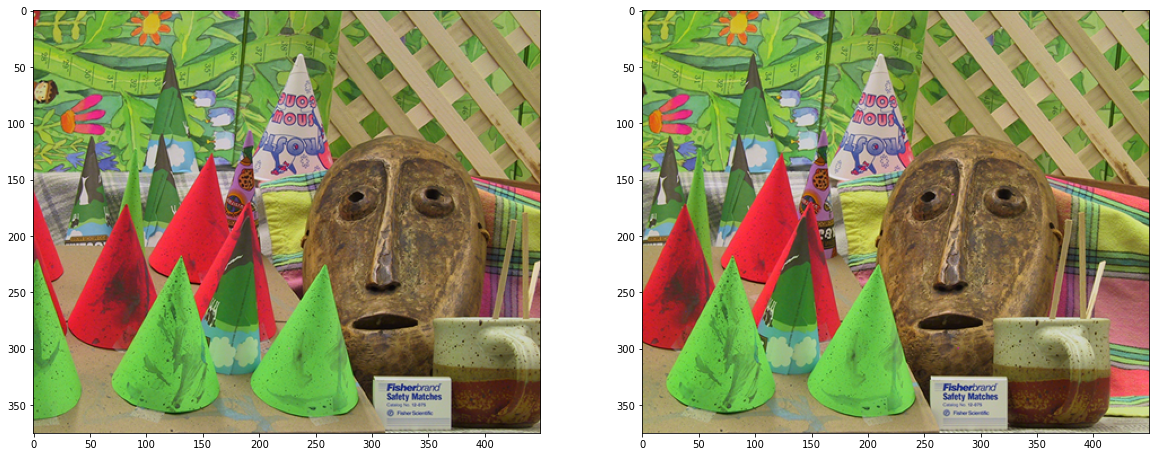

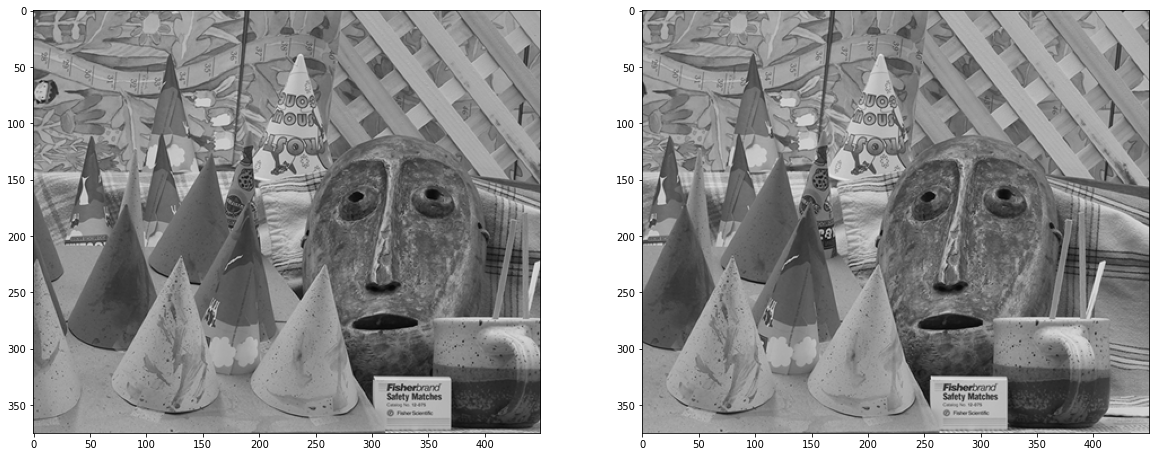

*************************************************************Using window size =  1 *************************************************************


100%|██████████| 375/375 [01:21<00:00,  4.60it/s]

**************************************************************** SAD results ****************************************************************


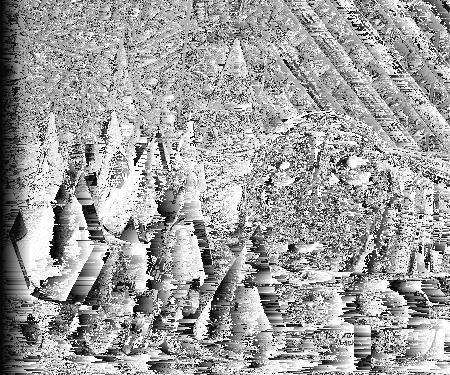

**************************************************************** SSD results ****************************************************************


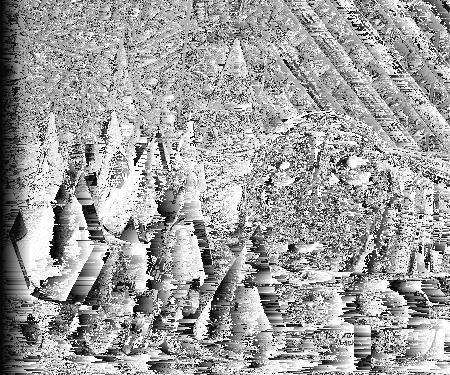

Difference


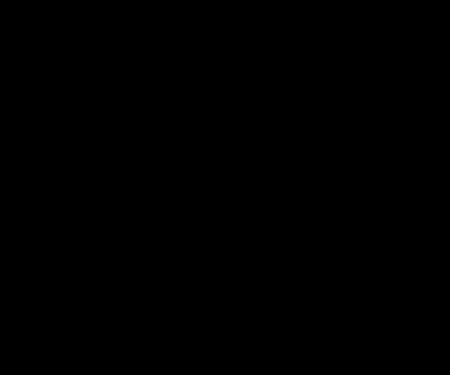

*************************************************************Using window size =  5 *************************************************************


100%|██████████| 375/375 [03:33<00:00,  1.76it/s]

**************************************************************** SAD results ****************************************************************


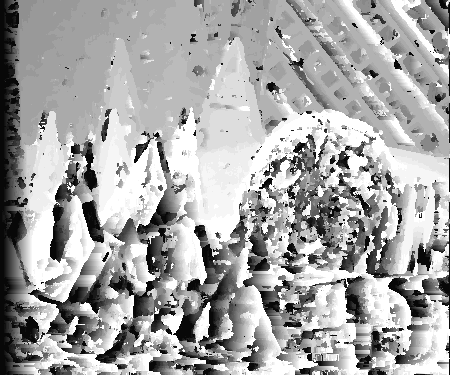

**************************************************************** SSD results ****************************************************************


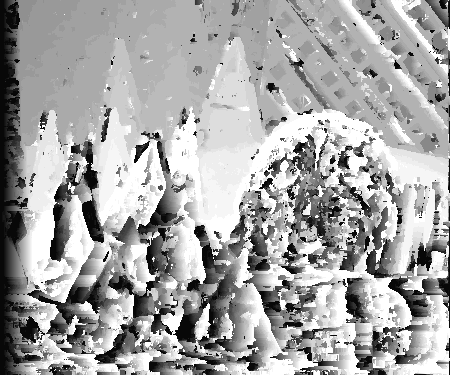

Difference


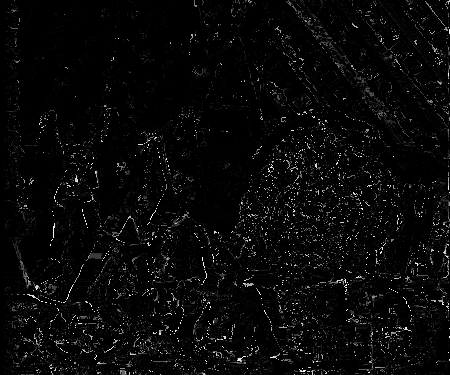

*************************************************************Using window size =  9 *************************************************************


100%|██████████| 375/375 [07:54<00:00,  1.27s/it]

**************************************************************** SAD results ****************************************************************


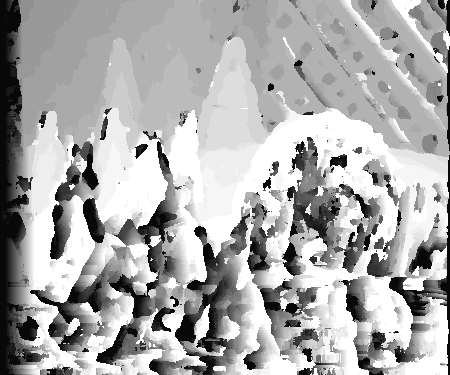

**************************************************************** SSD results ****************************************************************


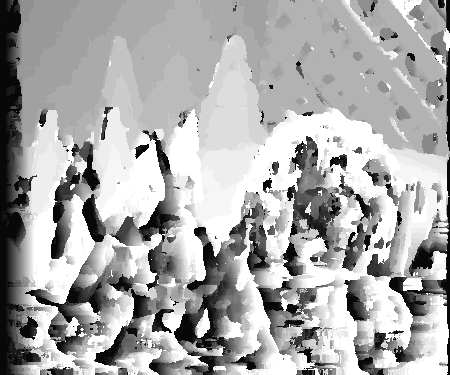

Difference


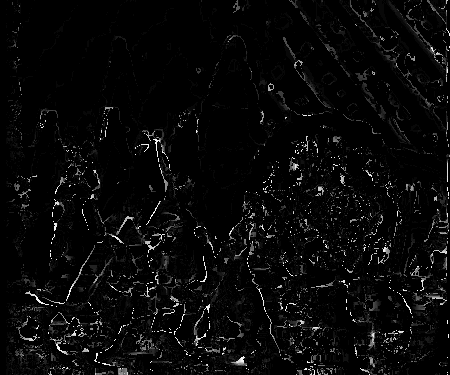

In [ ]:
mask_l = cv2.imread(imgs_folder + '/l2.png')
mask_r = cv2.imread(imgs_folder + '/r2.png')
plot_images(mask_l, mask_r)
get_results(mask_l,mask_r,30)

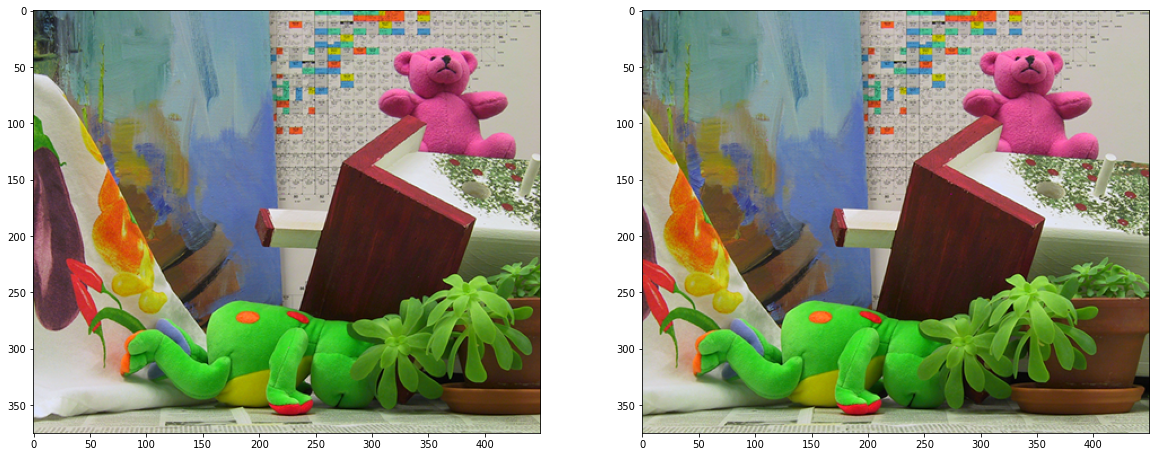

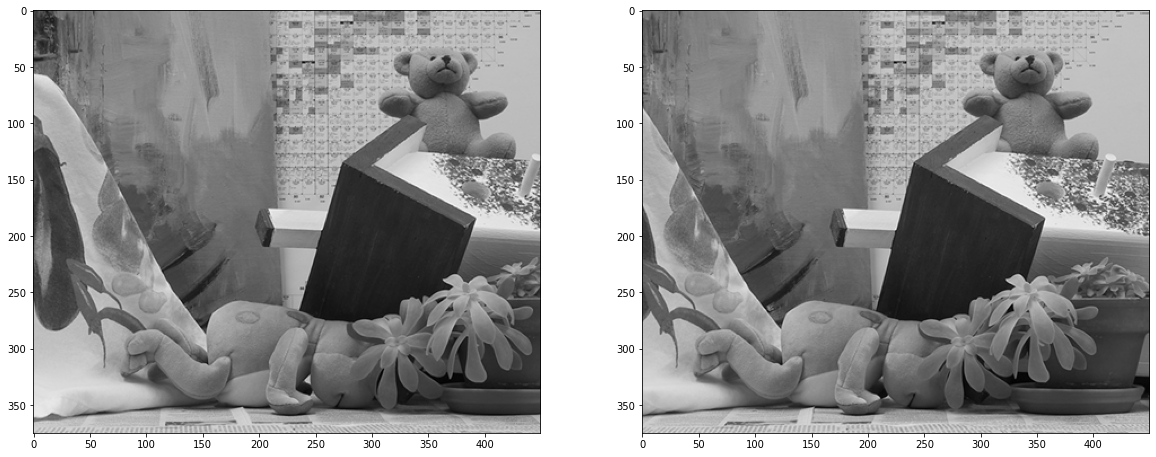

*************************************************************Using window size =  1 *************************************************************


100%|██████████| 375/375 [01:22<00:00,  4.53it/s]

**************************************************************** SAD results ****************************************************************


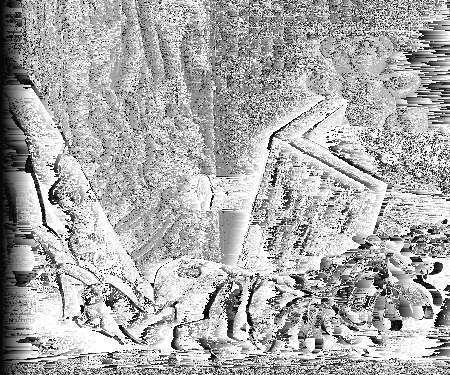

**************************************************************** SSD results ****************************************************************


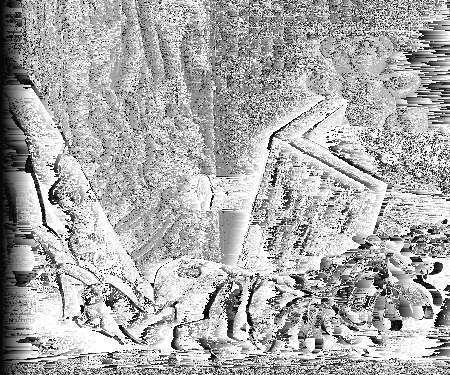

Difference


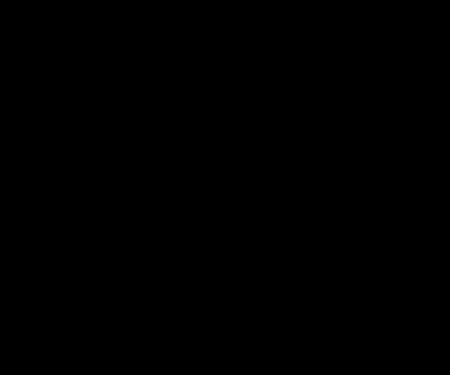

*************************************************************Using window size =  5 *************************************************************


100%|██████████| 375/375 [03:27<00:00,  1.80it/s]

**************************************************************** SAD results ****************************************************************


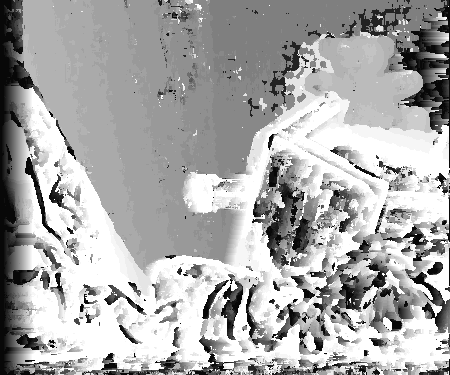

**************************************************************** SSD results ****************************************************************


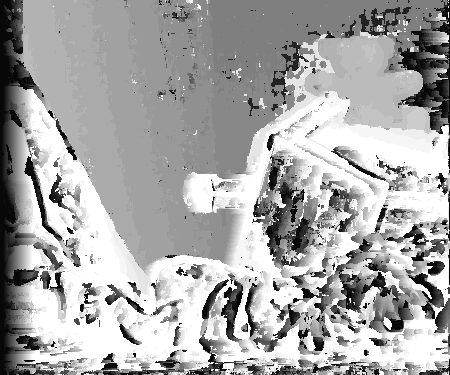

Difference


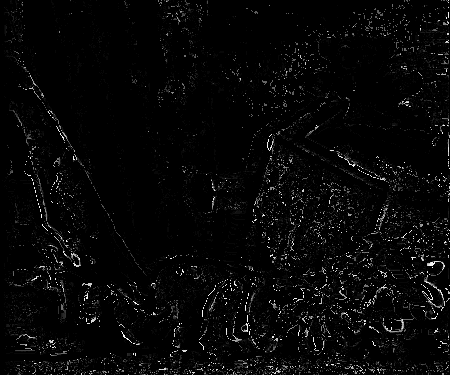

*************************************************************Using window size =  9 *************************************************************


100%|██████████| 375/375 [07:39<00:00,  1.23s/it]

**************************************************************** SAD results ****************************************************************


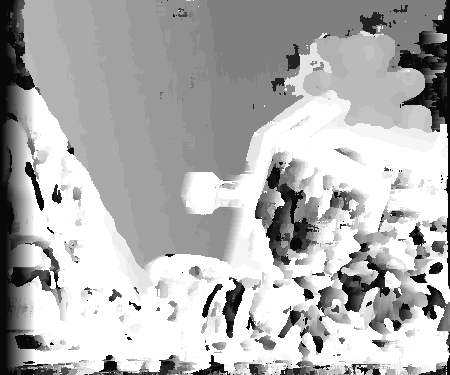

**************************************************************** SSD results ****************************************************************


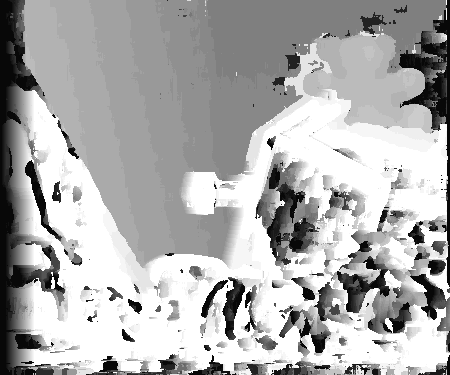

Difference


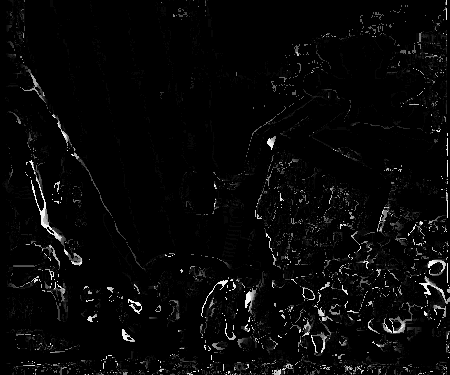

In [ ]:
teddy_l = cv2.imread(imgs_folder + '/l3.png')
teddy_r = cv2.imread(imgs_folder + '/r3.png')
plot_images(teddy_l, teddy_r)
get_results(teddy_l,teddy_r,30)